In [38]:
# -*- coding: utf-8 -*-
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
import warnings
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.api as sm



In [39]:
dataset = read_csv('training.csv',
                     ',',
                     index_col=['Date'],
                     parse_dates=['Date'],
                     dayfirst=True)

In [40]:
datatest = read_csv('testing.csv',
                     ',',
                     index_col=['Date'],
                     parse_dates=['Date'],
                     dayfirst=True)

In [41]:

model = sm.tsa.statespace.SARIMAX(dataset.Value, order=(1, 1, 10), seasonal_order = (0, 0, 2, 12)).fit(disp = -1)
print ('AIC =', model.aic)


C:\Users\123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC = 248.712972079


r2_score =  0.508431499751


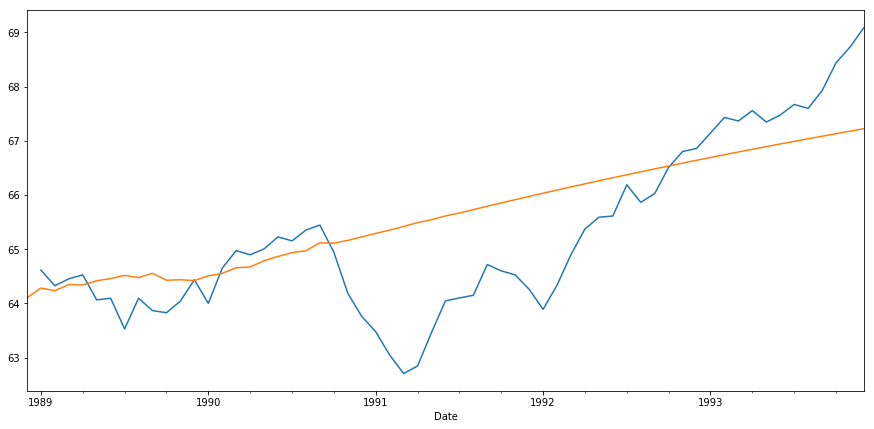

In [42]:
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred = model.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True)
print ('r2_score = ',r2_score(datatest.Value, pred['1989-01-01':]))
pred.plot()
plt.show()

In [43]:
model = sm.tsa.statespace.SARIMAX(dataset.Value, order=(1, 1, 6), seasonal_order = (0, 0, 2, 12)).fit(disp = -1)
print ('AIC =', model.aic)

C:\Users\123\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC = 239.422835886


r2_score =  -0.259044574517


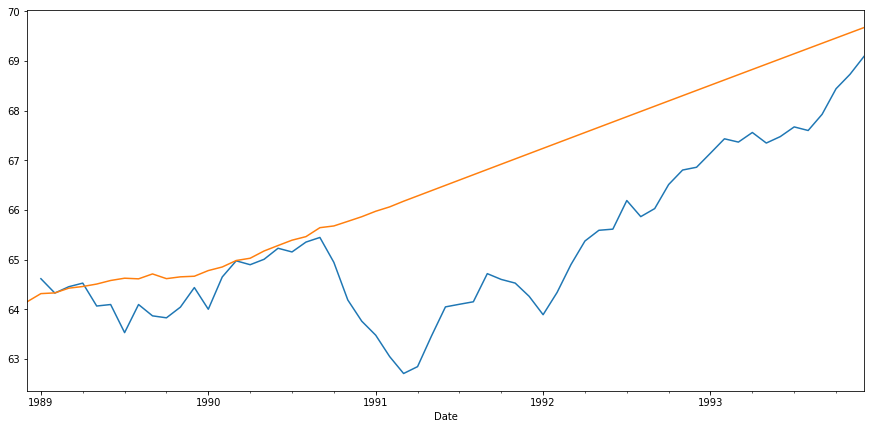

In [44]:
#модель с наименьшим aic. Но её R2_score отрицательный, что говорит о её неадекватности, значит посмотрим модели с меньшим aic
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred = model.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True)
print ('r2_score = ',r2_score(datatest.Value, pred['1989-01-01':]))
pred.plot()
plt.show()